# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
rcd = 0
sets = 1
weather = []
print('Beginning Data Retrieval\n-----------------------------')

for city in cities:
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    res = requests.get(url).json()
    try:
        weather.append({
            'City':city,
            'Lat':res['coord']['lat'],
            'Lng':res['coord']['lon'],
            'Temp':res['main']['temp_max'],
            'Hum':res['main']['humidity'],
            'cloud':res['clouds']['all'],
            'Win Speed':res['wind']['speed'],
            'Country':res['sys']['country'],
            'Date':res['dt']})
    except:
            pass
            print('City not found. Skipping...')        

print('\n-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | carora
Processing Record 6 of Set 1 | osterburg
Processing Record 7 of Set 1 | netolice
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | mosquera
Processing Record 11 of Set 1 | bilma
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | soure
Processing Record 16 of Set 1 | pak phanang
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | kuminskiy
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | dubbo
Processing Re

Processing Record 36 of Set 4 | riga
Processing Record 37 of Set 4 | mehamn
Processing Record 38 of Set 4 | ankazoabo
Processing Record 39 of Set 4 | shahreza
Processing Record 40 of Set 4 | chagda
City not found. Skipping...
Processing Record 41 of Set 4 | pacific grove
Processing Record 42 of Set 4 | lumphat
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | haibowan
City not found. Skipping...
Processing Record 45 of Set 4 | akyab
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 48 of Set 4 | berbera
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | capiibary
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | salvador
Processing Record 6 of Set 5 | kenora
Proc

City not found. Skipping...
Processing Record 27 of Set 8 | evensk
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | novopokrovka
Processing Record 31 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 32 of Set 8 | baoqing
Processing Record 33 of Set 8 | suoyarvi
Processing Record 34 of Set 8 | porto santo
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | natal
Processing Record 37 of Set 8 | eydhafushi
Processing Record 38 of Set 8 | longyearbyen
Processing Record 39 of Set 8 | uray
Processing Record 40 of Set 8 | mabaruma
Processing Record 41 of Set 8 | naftah
City not found. Skipping...
Processing Record 42 of Set 8 | sarangani
Processing Record 43 of Set 8 | bay roberts
Processing Record 44 of Set 8 | illapel
Processing Record 45 of Set 8 | vanimo
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | port blair
Processing Record 48

Processing Record 15 of Set 12 | opelousas
Processing Record 16 of Set 12 | adrar
Processing Record 17 of Set 12 | houma
Processing Record 18 of Set 12 | omsukchan
Processing Record 19 of Set 12 | pedernales
Processing Record 20 of Set 12 | ijaki
City not found. Skipping...
Processing Record 21 of Set 12 | toba tek singh
Processing Record 22 of Set 12 | ordu
Processing Record 23 of Set 12 | jackson
Processing Record 24 of Set 12 | alenquer
Processing Record 25 of Set 12 | richards bay
Processing Record 26 of Set 12 | matagami
Processing Record 27 of Set 12 | bubaque
Processing Record 28 of Set 12 | whitianga
Processing Record 29 of Set 12 | bo rai
Processing Record 30 of Set 12 | pilar
Processing Record 31 of Set 12 | puerto colombia
Processing Record 32 of Set 12 | kendari
Processing Record 33 of Set 12 | skoghall
Processing Record 34 of Set 12 | ganzhou
Processing Record 35 of Set 12 | cabedelo
Processing Record 36 of Set 12 | jian
Processing Record 37 of Set 12 | chiredzi
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
df = pd.DataFrame(weather)
df.head()

,City,Lat,Lng,Temp,Hum,cloud,Win Speed,Country,Date
0,upernavik,72.7868,-56.1549,29.21,92,100,7.52,GL,1635654548
1,atuona,-9.8000,-139.0333,78.85,74,21,18.75,PF,1635654512
2,airai,-8.9266,125.4092,75.24,58,88,1.48,TL,1635654259
3,tuktoyaktuk,69.4541,-133.0374,17.60,100,75,10.36,CA,1635654549
4,carora,10.1755,-70.0827,72.84,91,100,2.46,VE,1635654549


In [35]:
df.describe()

,Lat,Lng,Temp,Hum,cloud,Win Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.431856,14.188941,60.218211,72.963158,59.624561,7.403035,1.635655e+09
std,32.981685,89.479502,20.614375,20.831664,39.394621,5.486309,1.002730e+02
min,-54.800000,-175.200000,-11.690000,10.000000,0.000000,0.000000,1.635654e+09
25%,-8.068925,-62.935025,46.505000,62.250000,20.000000,3.452500,1.635655e+09
50%,22.206250,18.462200,63.695000,77.000000,75.000000,6.390000,1.635655e+09
75%,47.729150,91.286450,77.042500,91.000000,98.750000,9.967500,1.635655e+09
max,78.218600,179.316700,95.220000,100.000000,100.000000,32.730000,1.635655e+09


In [36]:
#weather py csv

df.to_csv("weather_data.csv", encoding = "utf-8", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.

#N/A

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

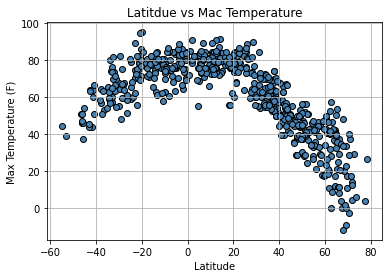

In [39]:
#x axis
latitude = df ['Lat']
plt.xlabel("Latitude")
#y axis 
Max_temp = df ['Temp']
plt.ylabel("Max Temperature (F)")
plt.title("Latitdue vs Mac Temperature")
plt.scatter(latitude, Max_temp, facecolor = 'steelblue', edgecolor = 'black')
plt.grid()
plt.savefig("fig1")

## Latitude vs. Humidity Plot

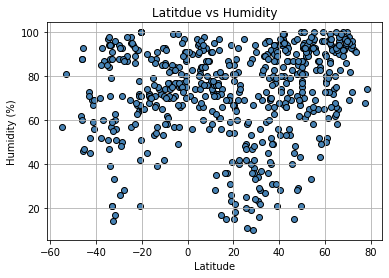

In [40]:
#x axis
latitude = df ['Lat']
plt.xlabel("Latitude")
#y axis 
humidity = df ['Hum']
plt.ylabel("Humidity (%)")
plt.title("Latitdue vs Humidity")
plt.scatter(latitude, humidity, facecolor = 'steelblue', edgecolor = 'black')
plt.grid()
plt.savefig("fig2")

## Latitude vs. Cloudiness Plot

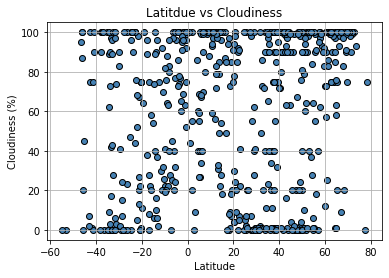

In [41]:
#x axis
latitude = df ['Lat']
plt.xlabel("Latitude")
#y axis 
cloudiness = df ['cloud']
plt.ylabel("Cloudiness (%)")
plt.title("Latitdue vs Cloudiness")
plt.scatter(latitude, cloudiness, facecolor = 'steelblue', edgecolor = 'black')
plt.grid()
plt.savefig("fig3")

## Latitude vs. Wind Speed Plot

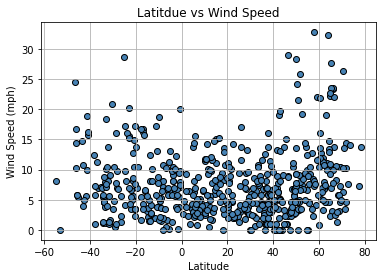

In [42]:
#x axis
latitude = df ['Lat']
plt.xlabel("Latitude")
#y axis 
windspeed = df ['Win Speed']
plt.ylabel("Wind Speed (mph)")
plt.title("Latitdue vs Wind Speed")
plt.scatter(latitude, windspeed, facecolor = 'steelblue', edgecolor = 'black')
plt.grid()
plt.savefig("fig4")

## Linear Regression

In [43]:
northern_hemisphere = df.loc[df['Lat'] >= 0]
southern_hemisphere = df.loc[df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

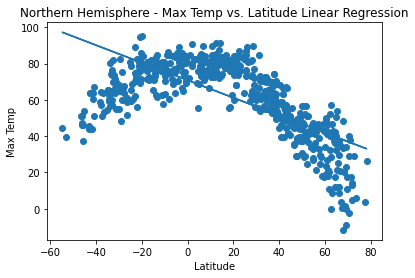

In [44]:
max_temp = df['Temp']
latitude = df['Lat']
line = linregress(latitude, max_temp)
line
#LinregressResult(slope=-0.48293352556254626, intercept=70.8036690760674, rvalue=-0.6683911085252099, pvalue=4.230793400483677e-77, stderr=0.02223884790897747, intercept_stderr=0.8868785819854406)
slope = -0.48293352556254626
intercept = 70.8036690760674
line_reg = slope*(latitude) + intercept
plt.scatter(latitude,max_temp)
plt.plot(latitude, line_reg)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("fig5")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

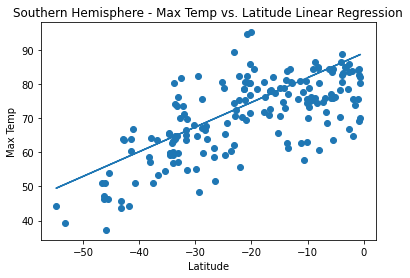

In [45]:
max_temp = southern_hemisphere ['Temp']
latitude = southern_hemisphere ['Lat']
line = linregress(latitude, max_temp)
line
#LinregressResult(slope=0.7236938840959517, intercept=89.13691570299568, rvalue=0.7400064960829678, pvalue=2.338017575598896e-29, stderr=0.05200152288288976, intercept_stderr=1.275346494190952)
slope = 0.7236938840959517
intercept = 89.13691570299568
line_reg = slope*(latitude) + intercept
plt.scatter(latitude,max_temp)
plt.plot(latitude, line_reg)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("fig6")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

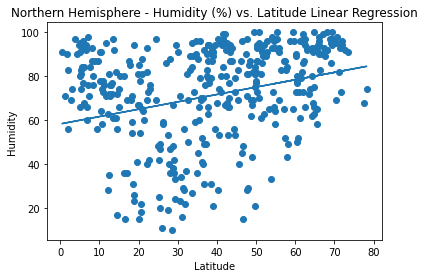

In [46]:
humidity = northern_hemisphere ['Hum']
latitude = northern_hemisphere ['Lat']
line = linregress(latitude, humidity)
line
# LinregressResult(slope= 0.3354339773399522, intercept=58.250904635356015, rvalue=0.30088036078318037, pvalue=2.542948945822618e-10, stderr=0.05175489297831981, intercept_stderr=2.296090692434491)
slope = 0.3354339773399522
intercept = 58.250904635356015
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, humidity)
plt.plot(latitude, line_reg)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("fig7")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

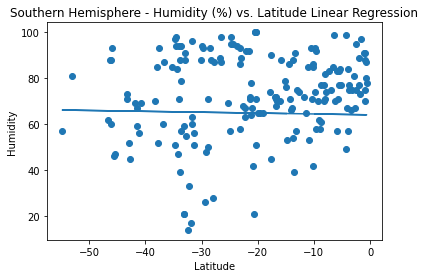

In [47]:
humidity = southern_hemisphere ['Hum']
latitude = southern_hemisphere ['Lat']
line = linregress(latitude, humidity)
line
# LinregressResult(slope=-0.038029205285174866, intercept=64.06781470318997, rvalue=-0.023770223523491663, pvalue=0.7639901318583189, stderr=0.12644488474448806, intercept_stderr=3.1010830361724295)
slope= -0.038029205285174866
intercept= 64.06781470318997
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, humidity)
plt.plot(latitude, line_reg)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("fig8")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

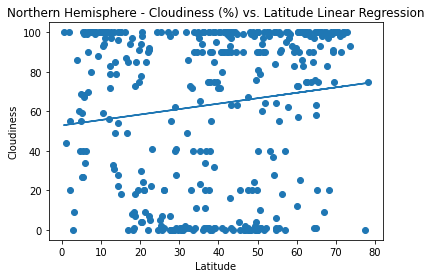

In [48]:
cloudiness = northern_hemisphere ['cloud']
latitude = northern_hemisphere ['Lat']
line = linregress(latitude, cloudiness)
line
# LinregressResult(slope=0.2750468786410424, intercept=52.86986918042618, rvalue=0.13953814734441566, pvalue=0.003990890366089389, stderr=0.09501404061146813, intercept_stderr=4.215270127019151)
slope= 0.2750468786410424
intercept= 52.86986918042618
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, cloudiness)
plt.plot(latitude, line_reg)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("fig9")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

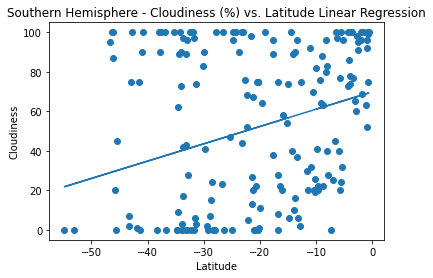

In [49]:
cloudiness = southern_hemisphere ['cloud']
latitude = southern_hemisphere ['Lat']
line = linregress(latitude, cloudiness)
line
#LinregressResult(slope=0.8752772210280589, intercept=69.8047936536675, rvalue=0.2801835031712297, pvalue=0.000304851046804017, stderr=0.23707736130195964, intercept_stderr=5.814363980636057)
slope= 0.8752772210280589
intercept= 69.8047936536675
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, cloudiness)
plt.plot(latitude, line_reg)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("fig10")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

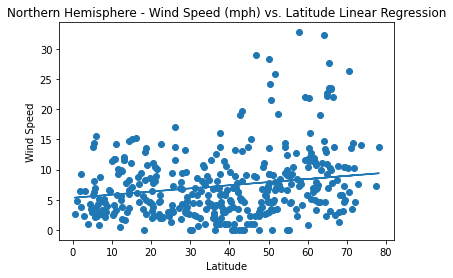

In [50]:
wind_speed = northern_hemisphere ['Win Speed']
latitude = northern_hemisphere ['Lat']
line = linregress(latitude, wind_speed)
line
# LinregressResult(slope=0.05189807206843576, intercept=5.318685053429872, rvalue=0.20845529998455983, pvalue=1.5093829169541725e-05, stderr=0.01185318535571142, intercept_stderr=0.5258631021099902)
slope = 0.05189807206843576
intercept= 5.318685053429872
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, wind_speed)
plt.plot(latitude, line_reg)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("fig11")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

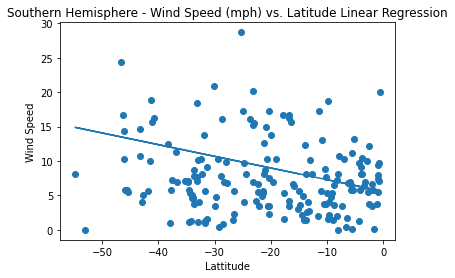

In [51]:
Wind_speed = southern_hemisphere ['Win Speed']
latitude = southern_hemisphere ['Lat']
line = linregress(latitude, Wind_speed)
line
#LinregressResult(slope=-0.16935889950917843, intercept=5.604075335736739, rvalue=-0.3745951976735979, pvalue=9.065778289799136e-07, stderr=0.03314010219183619, intercept_stderr=0.8127668345919693)
slope= -0.16935889950917843
intercept= 5.604075335736739
line_reg = slope*(latitude) + intercept
plt.scatter(latitude, Wind_speed)
plt.plot(latitude, line_reg)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Lattitude")
plt.savefig("fig12")